# DEMET SUDE KAN

Hybrid Image Demonstration Project for the Image and Optical Processing course

# Step 1

At first, I have imported cv2, NumPy, numpy.fft (to do Fourier Transformation) and matplotlib for the image visualization

In [1]:
import cv2
import numpy as np
import numpy.fft as fft
from matplotlib import pyplot as plt

# Step 2

I have defined a function to create a 2-Dimensional Gaussian Kernel. At first, I have divided (floor) the rows and columns by 2 to obtain the highest coordinate (index) values. Let's say the row value is 3, then in the coordinate plane the indices should be as follows (-3, -2, -1, 0, 1, 2, 3). Therefore I have used the np.ogrid function to achieve this. The function (np. ogrid) is simply creating arrays for the column and row indices. Then we have applied our 2 dimensional gaussian formula to get the gaussian kernel. After that, we have created a mask to check whether the approximation error due to rounding is at an acceptable level. If it is not at the acceptable level we set that value to 0. In the last step, I have divided the values of the matrix by the sum of it to make the kernel ready to use. 

In [2]:
def gaussian(shape,sigma):
    
    
    r=shape[0]//2
    c=shape[1]//2
    y, x = np.ogrid[-r:r+1,-c:c+1]
    h = np.exp(-(x*x + y*y) / (2.*sigma*sigma))
    mask=h < np.finfo(h.dtype).eps * h.max()
    h[ mask ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h


# Step 3

In this step, I have applied Fourier Transformation and Inverse Fourier Transformation to channels (Red, Green, Blue) of my image since we are applying filters in the frequency domain. Also, I have applied Fourier transformation to our kernel to be able to multiply with the channel which is in the frequency domain. In addition to this, according to the calling function, it subtracts the kernelF from 1 to convert it to a high pass kernel. In the last step, I have applied the Inverse Fourier Transformation to convert the channel back to the spatial domain.

In [3]:
def FilterFunction(Channel,kernel,option="H"): 
    imF=fft.fft2(Channel)
    kernelF=fft.fft2(kernel,s=[Channel.shape[0],Channel.shape[1]])
    if(option=="H"):
        kernelF=1-kernelF
    outF=np.multiply(imF,kernelF)
    out=fft.ifft2(outF)
    return out

# Step 4

In Step 4, I defined my High Pass Filter function to make the image sharper. Since I am working in the frequency domain I have to apply Fourier Transformation and to be able to apply the Fourier Transformation to the RGB image, I had to split the channels and apply them separately. So I initialized a 7x7 Gaussian kernel with sigma 0.75 and then through the FilterFunction we have applied this kernel to each channel. In the end, I have merged the channels back to see the filtered image.

In [4]:
def highPassFilter(image):
    image=np.double(image)
    red=image[:,:,0]
    green=image[:,:,1]
    blue=image[:,:,2]
    
    gaussKernel=gaussian(shape=(7, 7),sigma=0.75)
    redH=FilterFunction(red,gaussKernel,option="H")
    greenH=FilterFunction(green,gaussKernel,option="H")
    blueH=FilterFunction(blue,gaussKernel,option="H")
    out=cv2.merge([np.float32(redH.real),np.float32(greenH.real),np.float32(blueH.real)])
    return out

# Step 5

In Step 5, I defined my Low-Pass Filter function to make the image smoother. I have exactly applied the same things with Step 4, except the kernel size, sigma value, and FilterFunction's 'option' parameter. Kernel size set to 15x15 and sigma to 3 worked best for blurring the image. In the last step, I have merged the filtered channels to convert the image back to RGB.


In [5]:
def lowPassFilter(image):
    image=np.double(image)
    red=image[:,:,0]
    green=image[:,:,1]
    blue=image[:,:,2]
    
    gaussKernel=gaussian(shape=(15, 15),sigma=3)
    redH=FilterFunction(red,gaussKernel,option="L")
    greenH=FilterFunction(green,gaussKernel,option="L")
    blueH=FilterFunction(blue,gaussKernel,option="L")
    out=cv2.merge([np.float32(redH.real),np.float32(greenH.real),np.float32(blueH.real)])    

    return out

# Step 6

I defined three different functions for the step 6: 

1. 'hybridImageCombine' function combines low frequency and high-frequency images by an addition operation.
2. 'readImage' functions reads the image from its path and returns a matrix by using cv2.imread function.
3.  To display an image, I have defined the 'displayImage' function. Also, to be able to display an RGB image by using matplotlib library, I have used the cv2.cvtColor function so that I have changed the color space as an RGB.

In [6]:
def hybridImageCombine(high_frequency_image, low_frequency_image):
    hybridImage = high_frequency_image + low_frequency_image
    return hybridImage

def readImage(image_path):
    image = cv2.imread(image_path)
    return image

def displayImage(image):
    image=cv2.cvtColor(np.float32(image.real), cv2.COLOR_BGR2RGB)
    plt.imshow((image).astype(np.uint8))
    plt.show()


# Step 6

In the last step, in order to create a hybrid image, I have read the angry and calm images from their paths by using the readImage function. After that, I have applied high pass filter to the angry image and low  pass filter to the calm image. In the end I combined the filtered images and obtained a hybrid image. As a result, I got an image that looks calm when I look closely and looks angry when I look from afar.

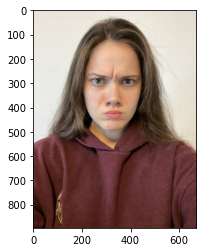

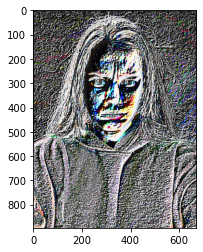

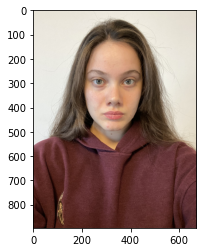

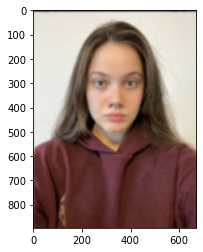

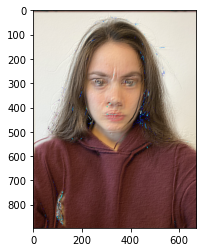

In [7]:
image_path_1 = './images/angry.jpg'
image = readImage(image_path_1)
displayImage(image)

highFreqImage = highPassFilter(image)
displayImage(highFreqImage)

image_path_2 = './images/calm.jpg'
image2 = readImage(image_path_2)
displayImage(image2)

lowFreqImage = lowPassFilter(image2)
displayImage(lowFreqImage)

hybridImage =  hybridImageCombine(highFreqImage, lowFreqImage)
displayImage(hybridImage)
